In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'Korean Data2/'
os.listdir(path)

['inp_deri_up_other_dragon[1].csv',
 'out_other_up_dragon[1].csv',
 'inp_deri_up_other_dragonfx[1].csv',
 'inp_deri_other_up_test_whole_dragon[1].csv',
 'out_other_up_test_whole_dragon[1].csv',
 'inp_deri_other_up_test_whole_dragonfx[1].csv',
 'out_other_up_test_whole_dragonfx[1].csv',
 'out_other_up_dragonfx[1].csv']

In [4]:
X_train = pd.read_csv(path+'inp_deri_up_other_dragon[1].csv')

y_train = pd.read_csv(path+'out_other_up_dragon[1].csv')
y_test = pd.read_csv(path+'out_other_up_test_whole_dragon[1].csv')

X_test = pd.read_csv(path+'inp_deri_other_up_test_whole_dragon[1].csv')
print(y_train.head())
X_train.head()

   0.43756
0  0.43756
1  0.43887
2  0.43854
3  0.43953
4  0.43986


,0.01061,0.01061.1,0.01061.2,0.01061.3,0.01061.4,0.01061.5,0.01061.6,0.01061.7,0.01061.8,0.01061.9
0,0.010080,0.009549,0.009019,0.008488,0.007958,0.007427,0.006897,0.006366,0.005836,0.005305
1,0.009828,0.009072,0.008342,0.007639,0.006963,0.006313,0.005690,0.005093,0.004523,0.003979
2,0.009664,0.008769,0.007925,0.007130,0.006383,0.005682,0.005026,0.004414,0.003844,0.003316
3,0.009543,0.008550,0.007628,0.006774,0.005984,0.005256,0.004586,0.003973,0.003412,0.002901
4,0.009448,0.008379,0.007399,0.006503,0.005685,0.004940,0.004265,0.003655,0.003105,0.002611


In [5]:
len(X_train),len(y_test),len(y_train)

(75991, 160036, 75991)

In [6]:
x_train,y_train,x_test,y_test = np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)

In [7]:
# Random Forest
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
y1 = y1_pred
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Time taken by Random Forest 0:00:55.962083
Root Mean Squared error of Random Forest 0.18714303214285152


Minimum Error = 1.0000000036924916e-06
Maximum Error = 0.49841199999999874
Median Value of Error = 0.14592199999999966


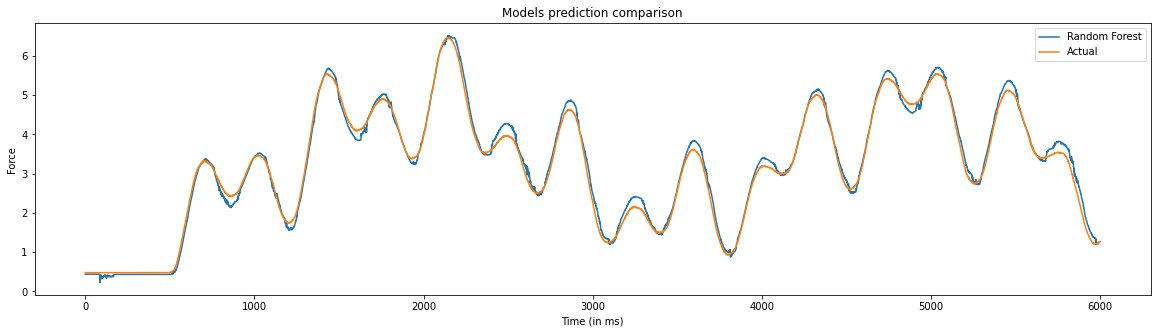

In [8]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test[i,0]))
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])
    
# COMPARISON
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

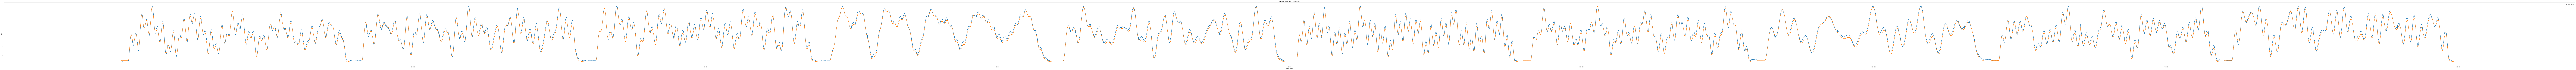

In [10]:
plt.figure(figsize=(400,10))
plt.plot(list(range(160035)),y1[:160035], label = 'Random Forest')
plt.plot(list(range(160035)),y_test[:160035], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('RF_korean_dragon.jpg')
plt.show()

In [11]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.08116
0:	learn: 1.5034638	total: 59.2ms	remaining: 59.1s
1:	learn: 1.3839461	total: 64.1ms	remaining: 32s
2:	learn: 1.2748941	total: 71.8ms	remaining: 23.8s
3:	learn: 1.1747402	total: 77ms	remaining: 19.2s
4:	learn: 1.0818212	total: 81.8ms	remaining: 16.3s
5:	learn: 0.9960673	total: 88.3ms	remaining: 14.6s
6:	learn: 0.9177167	total: 101ms	remaining: 14.3s
7:	learn: 0.8455835	total: 111ms	remaining: 13.8s
8:	learn: 0.7791427	total: 116ms	remaining: 12.8s
9:	learn: 0.7181532	total: 121ms	remaining: 12s
10:	learn: 0.6616249	total: 125ms	remaining: 11.3s
11:	learn: 0.6098507	total: 130ms	remaining: 10.7s
12:	learn: 0.5625785	total: 135ms	remaining: 10.2s
13:	learn: 0.5188826	total: 139ms	remaining: 9.8s
14:	learn: 0.4788013	total: 145ms	remaining: 9.52s
15:	learn: 0.4418202	total: 151ms	remaining: 9.26s
16:	learn: 0.4076645	total: 158ms	remaining: 9.12s
17:	learn: 0.3765498	total: 162ms	remaining: 8.86s
18:	learn: 0.3477442	total: 168ms	remaining: 8.65s
19:	learn: 0.

In [12]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:05.961872
Root mean square error of Cat Boost Model:  0.18139438348132875


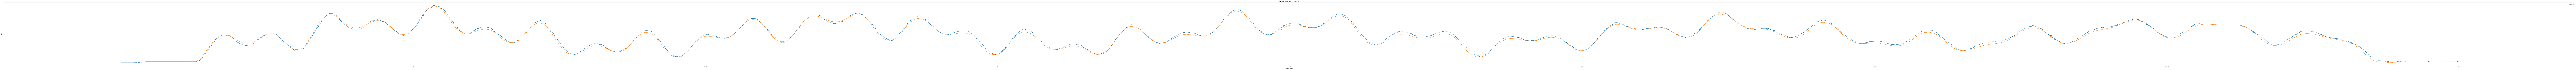

In [13]:
plt.figure(figsize=(400,10))
plt.plot(list(range(15994)),y_pred[:15994], label = 'Cat Boost')
plt.plot(list(range(15994)),y_test[:15994], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('catboost_korean_dragon.jpg')
plt.show()

In [14]:
import pickle
filename = 'catboost_dragon.sav'
pickle.dump(cat, open(filename, 'wb'))

In [15]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error of Cat Boost Model:  0.18139438348132875
